<a href="https://colab.research.google.com/github/aorizzuto/All_of_Python/blob/master/Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Students Performance in Exams

## Import

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Load data

Getting the data

In [6]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('StudentsPerformance.csv')

Saving StudentsPerformance.csv to StudentsPerformance.csv


## Checking data

In [7]:
data.head() # Check the column names and the data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data.describe() # Checking the information of the data as number of rows, mean values, min, max

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


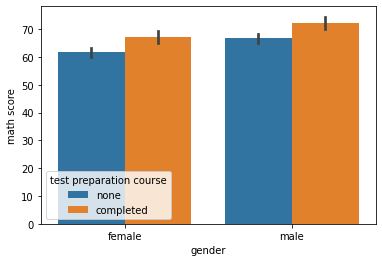

In [10]:
sns.barplot(x='gender',y='math score',data=data,hue='test preparation course')

## Correlation

In [11]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [12]:
df = pd.get_dummies(data=data,columns=['gender']) # Generate numeric value for gender columns

In [13]:
df

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_female,gender_male
0,group B,bachelor's degree,standard,none,72,72,74,1,0
1,group C,some college,standard,completed,69,90,88,1,0
2,group B,master's degree,standard,none,90,95,93,1,0
3,group A,associate's degree,free/reduced,none,47,57,44,0,1
4,group C,some college,standard,none,76,78,75,0,1
...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88,99,95,1,0
996,group C,high school,free/reduced,none,62,55,55,0,1
997,group C,high school,free/reduced,completed,59,71,65,1,0
998,group D,some college,standard,completed,68,78,77,1,0


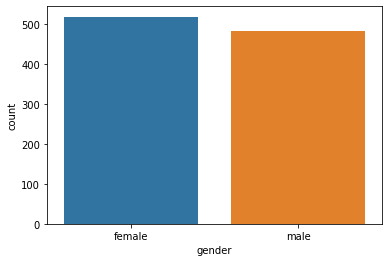

In [14]:
sns.countplot(data=data,x='gender') # Count of gender

<function matplotlib.pyplot.tight_layout>

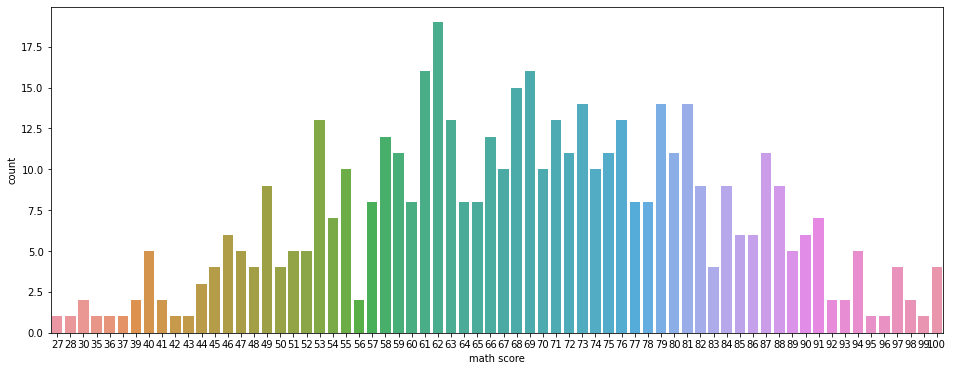

In [15]:
# Count of math score for male gender
plt.figure(figsize=(16,6))
sns.countplot(data=data[data['gender']=='male'],x='math score')
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

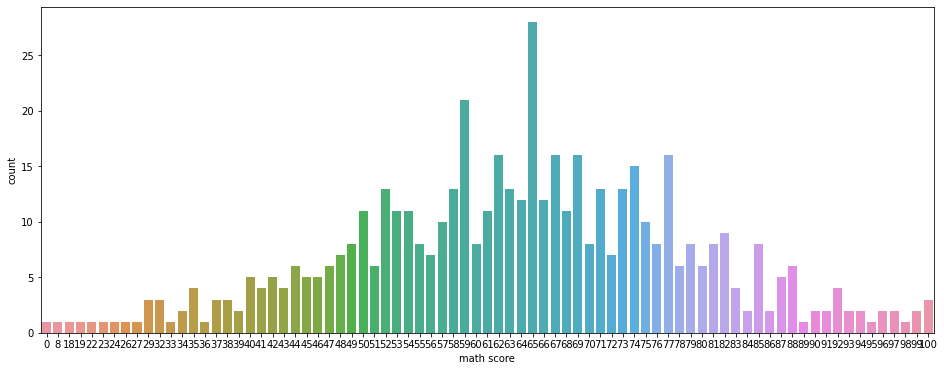

In [16]:
# Count of math score for female gender
plt.figure(figsize=(16,6))
sns.countplot(data=data[data['gender']=='female'],x='math score')
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

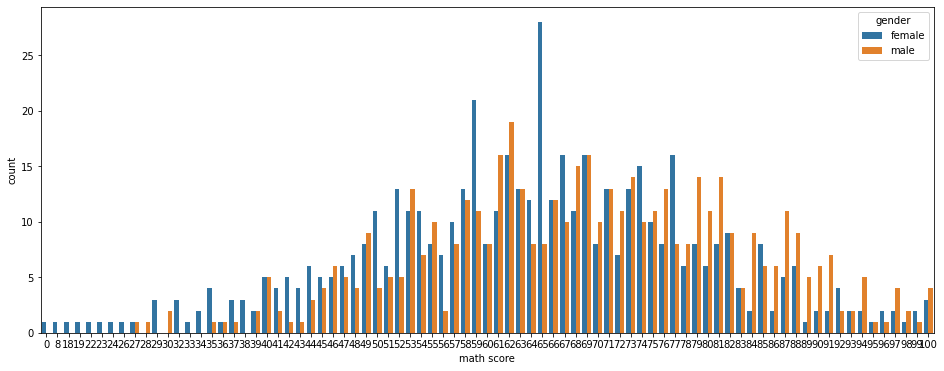

In [17]:
# Count of math score for both genders
plt.figure(figsize=(16,6))
sns.countplot(data=data,x='math score',hue='gender')
plt.tight_layout

## Distributions

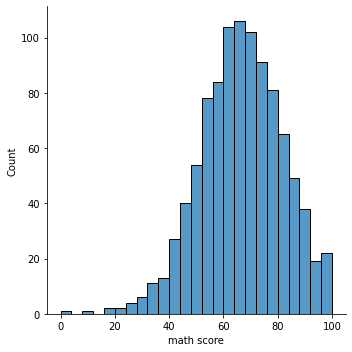

In [18]:
sns.displot(data['math score'])

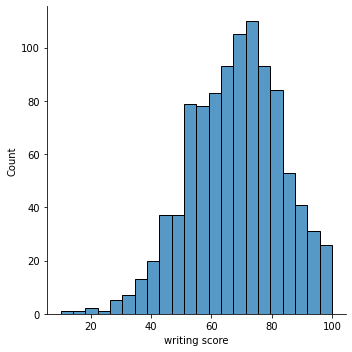

In [19]:
sns.displot(data['writing score'])

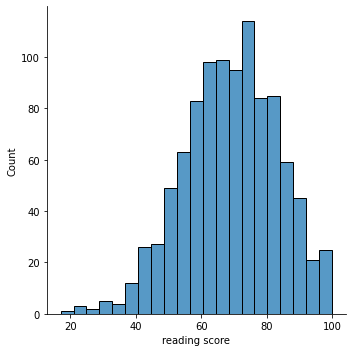

In [20]:
sns.displot(data['reading score'])

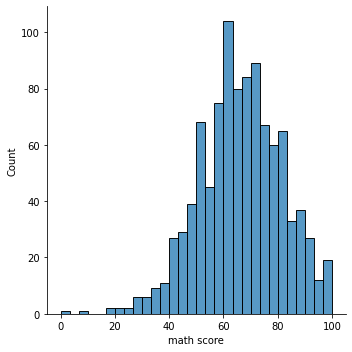

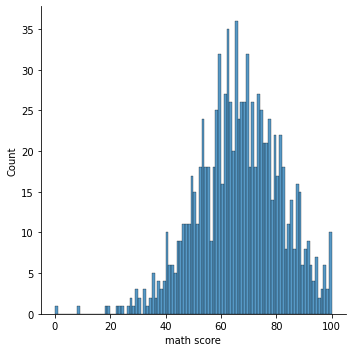

In [21]:
sns.displot(data['math score'],bins=30)
sns.displot(data['math score'],bins=100)

In [22]:
data.groupby(by='gender')['math score'].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

In [23]:
data.groupby(by='gender')['math score'].min()

gender
female     0
male      27
Name: math score, dtype: int64

In [24]:
data.groupby(by='gender')['math score'].std()

gender
female    15.491453
male      14.356277
Name: math score, dtype: float64

In [25]:
data.groupby(by='race/ethnicity')['gender'].count()

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: gender, dtype: int64

In [26]:
df[df['gender_female'] == 1].groupby(by='race/ethnicity')['gender_female'].count()

race/ethnicity
group A     36
group B    104
group C    180
group D    129
group E     69
Name: gender_female, dtype: int64

In [27]:
df[df['gender_male'] == 1].groupby(by='race/ethnicity')['gender_female'].count()

race/ethnicity
group A     53
group B     86
group C    139
group D    133
group E     71
Name: gender_female, dtype: int64

In [28]:
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_female,gender_male
0,group B,bachelor's degree,standard,none,72,72,74,1,0
1,group C,some college,standard,completed,69,90,88,1,0
2,group B,master's degree,standard,none,90,95,93,1,0
3,group A,associate's degree,free/reduced,none,47,57,44,0,1
4,group C,some college,standard,none,76,78,75,0,1


## Correlation

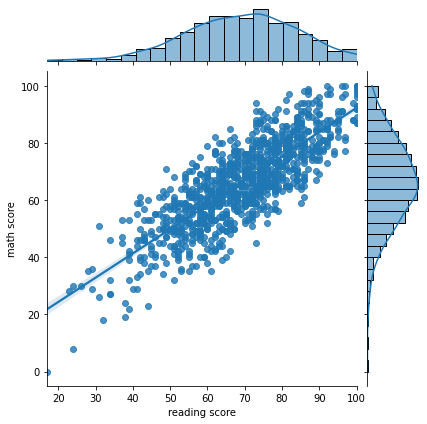

In [29]:
sns.jointplot(data=df, x='reading score',y='math score',kind='reg')

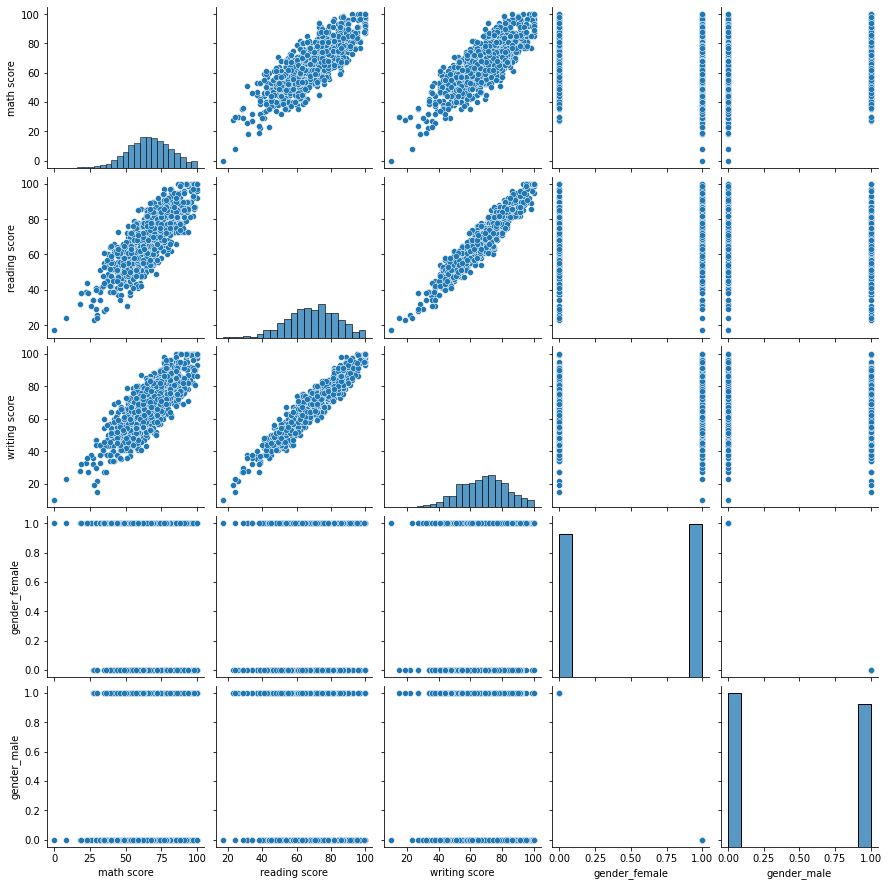

In [30]:
sns.pairplot(df,palette='coolwarm')

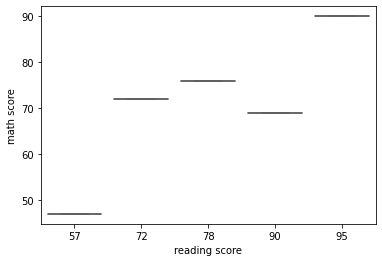

In [31]:
sns.boxplot(x=df['reading score'][:5],y='math score',data=df, palette="coolwarm")

In [32]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


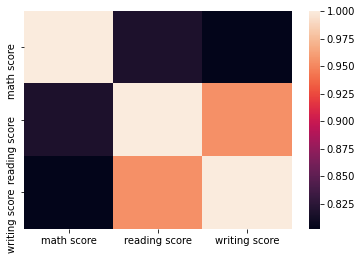

In [33]:
sns.heatmap(data.corr())

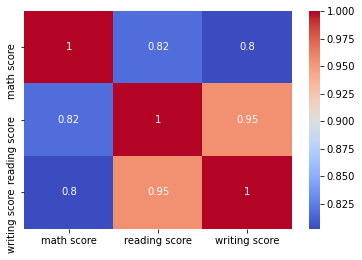

In [34]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [35]:
df.pivot_table(values='gender_female',index='math score',columns='reading score')

reading score,17,23,24,26,28,29,31,32,34,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,99,100
math score,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,NaN,1.0
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


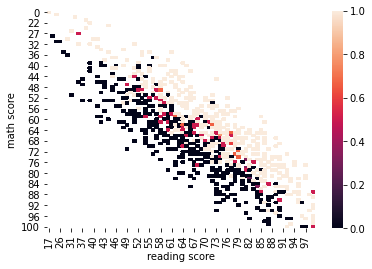

In [36]:
pvdata = df.pivot_table(values='gender_female',index='math score',columns='reading score')
sns.heatmap(pvdata)

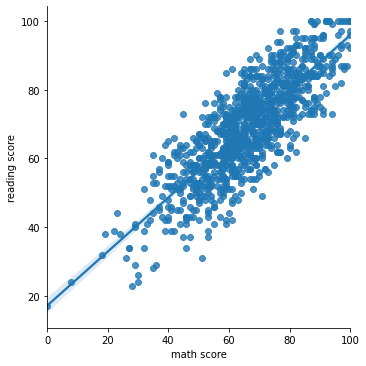

In [37]:
sns.lmplot(x='math score',y='reading score',data=df)

## Missing data

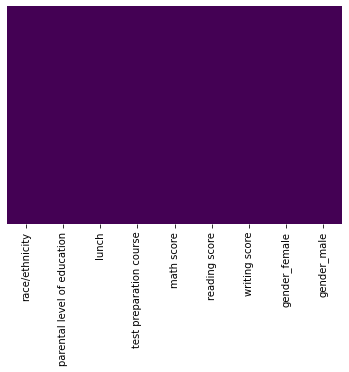

In [38]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Prediction

## Checking data

In [39]:
df

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_female,gender_male
0,group B,bachelor's degree,standard,none,72,72,74,1,0
1,group C,some college,standard,completed,69,90,88,1,0
2,group B,master's degree,standard,none,90,95,93,1,0
3,group A,associate's degree,free/reduced,none,47,57,44,0,1
4,group C,some college,standard,none,76,78,75,0,1
...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88,99,95,1,0
996,group C,high school,free/reduced,none,62,55,55,0,1
997,group C,high school,free/reduced,completed,59,71,65,1,0
998,group D,some college,standard,completed,68,78,77,1,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   race/ethnicity               1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
 7   gender_female                1000 non-null   uint8 
 8   gender_male                  1000 non-null   uint8 
dtypes: int64(3), object(4), uint8(2)
memory usage: 56.8+ KB


In [41]:
st = df.copy() # Uso una copia del df para no modificar el original

## Objects to int

In [42]:
le = LabelEncoder()
st['race/ethnicity'] = le.fit_transform(st['race/ethnicity'])
st['parental level of education'] = le.fit_transform(st['parental level of education'])
st['lunch'] = le.fit_transform(st['lunch'])
st['test preparation course'] = le.fit_transform(st['test preparation course'])

In [43]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   race/ethnicity               1000 non-null   int64
 1   parental level of education  1000 non-null   int64
 2   lunch                        1000 non-null   int64
 3   test preparation course      1000 non-null   int64
 4   math score                   1000 non-null   int64
 5   reading score                1000 non-null   int64
 6   writing score                1000 non-null   int64
 7   gender_female                1000 non-null   uint8
 8   gender_male                  1000 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 56.8 KB


## Split data into train/test

In [44]:
column_to_predict = 'writing score'

X = st.drop(column_to_predict, axis=1)
y = st[column_to_predict]

In [45]:
def print_shapes():
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)

In [46]:
from random import randint
from sklearn import metrics

randint(0,101)

24

In [47]:
with tf.device('/device:GPU:0'):
  minimo = 100
  rnd_minimo = 100

  for i in range(200):
      rnd = randint(0,101)
      
      # Separo data
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rnd)
      
      # Imprimo shapes
      print_shapes
      
      # Estandarizo
      xnorm = StandardScaler();
      ynorm = StandardScaler();
      X_train=xnorm.fit_transform(X_train)
      X_test=xnorm.transform(X_test)
      y_train=ynorm.fit_transform(np.array(y_train).reshape(-1,1))
      y_test=ynorm.transform(np.array(y_test).reshape(-1,1))
      
      model = Sequential()
      model.add(Dense(30, activation='sigmoid'))
      model.add(Dense(10, activation='relu'))
      model.add(Dense(5, activation='relu'))
      model.add(Dense(1))
      
      model.compile(optimizer='adam', loss='mse')
      
      history = model.fit(X_train,y_train,epochs=50,batch_size=32,verbose=0) #, validation_split=0.2)
      
      trainPredict = model.predict(X_train)
      testPredict = model.predict(X_test)
      
      new = metrics.mean_squared_error(y_test, testPredict)
      
      minimo = min([minimo, new])
      
      if minimo == new:
          rnd_minimo = rnd
          print ("Attempt {}: Cambió el mínimo!".format(i))
          print ("   MSE: ",new)
          lst=[history,y_test, testPredict]

Attempt 0: Cambió el mínimo!
   MSE:  0.06573582712408096
Attempt 1: Cambió el mínimo!
   MSE:  0.06346026181412237
Attempt 5: Cambió el mínimo!
   MSE:  0.06302154307746868
Attempt 6: Cambió el mínimo!
   MSE:  0.06082805802807051
Attempt 7: Cambió el mínimo!
   MSE:  0.05680927642946749
Attempt 9: Cambió el mínimo!
   MSE:  0.05550426656702701
Attempt 40: Cambió el mínimo!
   MSE:  0.05469337245959726
Attempt 66: Cambió el mínimo!
   MSE:  0.054505467284923476
Attempt 86: Cambió el mínimo!
   MSE:  0.051750012268453105


In [48]:
history=lst[0]
y_test=lst[1]
testPredict=lst[2]

In [49]:
metrics.mean_squared_error(y_test, testPredict)

0.051750012268453105

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, testPredict))
print('MSE:', metrics.mean_squared_error(y_test, testPredict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, testPredict)))

MAE: 0.1843683773621995
MSE: 0.051750012268453105
RMSE: 0.2274862902868063


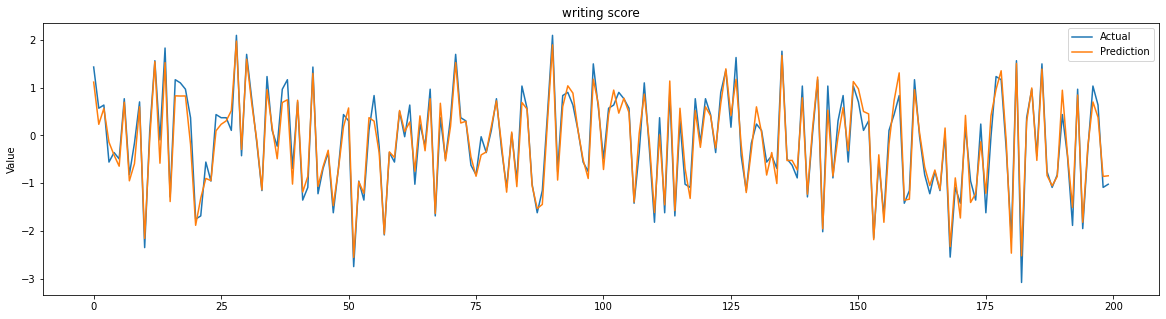

In [51]:
plt.figure(figsize=(20,5))
plt.plot(y_test, label='Actual')
plt.plot(testPredict, label='Prediction')
plt.ylabel('Value')
plt.title(column_to_predict)
plt.legend()

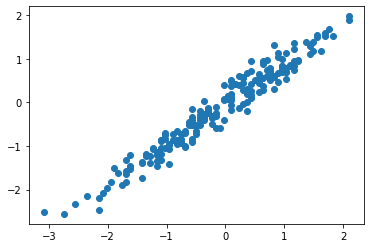

In [52]:
plt.scatter(y_test,testPredict)